# Exploratory Data Analysis
---
Using the data obtained in getting_data.ipynb, let's explore and analyse the scores each episode of DBZ gets.

First, let's analyse the reliability and completeness of the data.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

COMPILED_FILENAME = "data/compiled_data.csv"
compiled_df = pd.read_csv(COMPILED_FILENAME, index_col=0)
print(compiled_df.info())
print(compiled_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 290
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mal_id              291 non-null    int64  
 1   title               291 non-null    object 
 2   title_romanji       291 non-null    object 
 3   filler              291 non-null    bool   
 4   recap               291 non-null    bool   
 5   MAL_score           291 non-null    float64
 6   MAL_poll_votes      291 non-null    int64  
 7   IMDb_score          291 non-null    float64
 8   IMDb_total_votes    291 non-null    int64  
 9   r/dbz_rewatch_week  90 non-null     float64
 10  r/dbz_karma_score   90 non-null     float64
 11  r/dbz_upvote_ratio  90 non-null     float64
 12  r/dbz_num_comments  90 non-null     float64
dtypes: bool(2), float64(6), int64(3), object(2)
memory usage: 27.8+ KB
None
           mal_id   MAL_score  MAL_poll_votes  IMDb_score  IMDb_total_votes  \
coun

# Number of votes
---
For the MAL polls, the median number of votes is 40, and the minimum is 25. This is low enough to have questionable reliability, so it's good that we have the IMDb dataset to back it up.

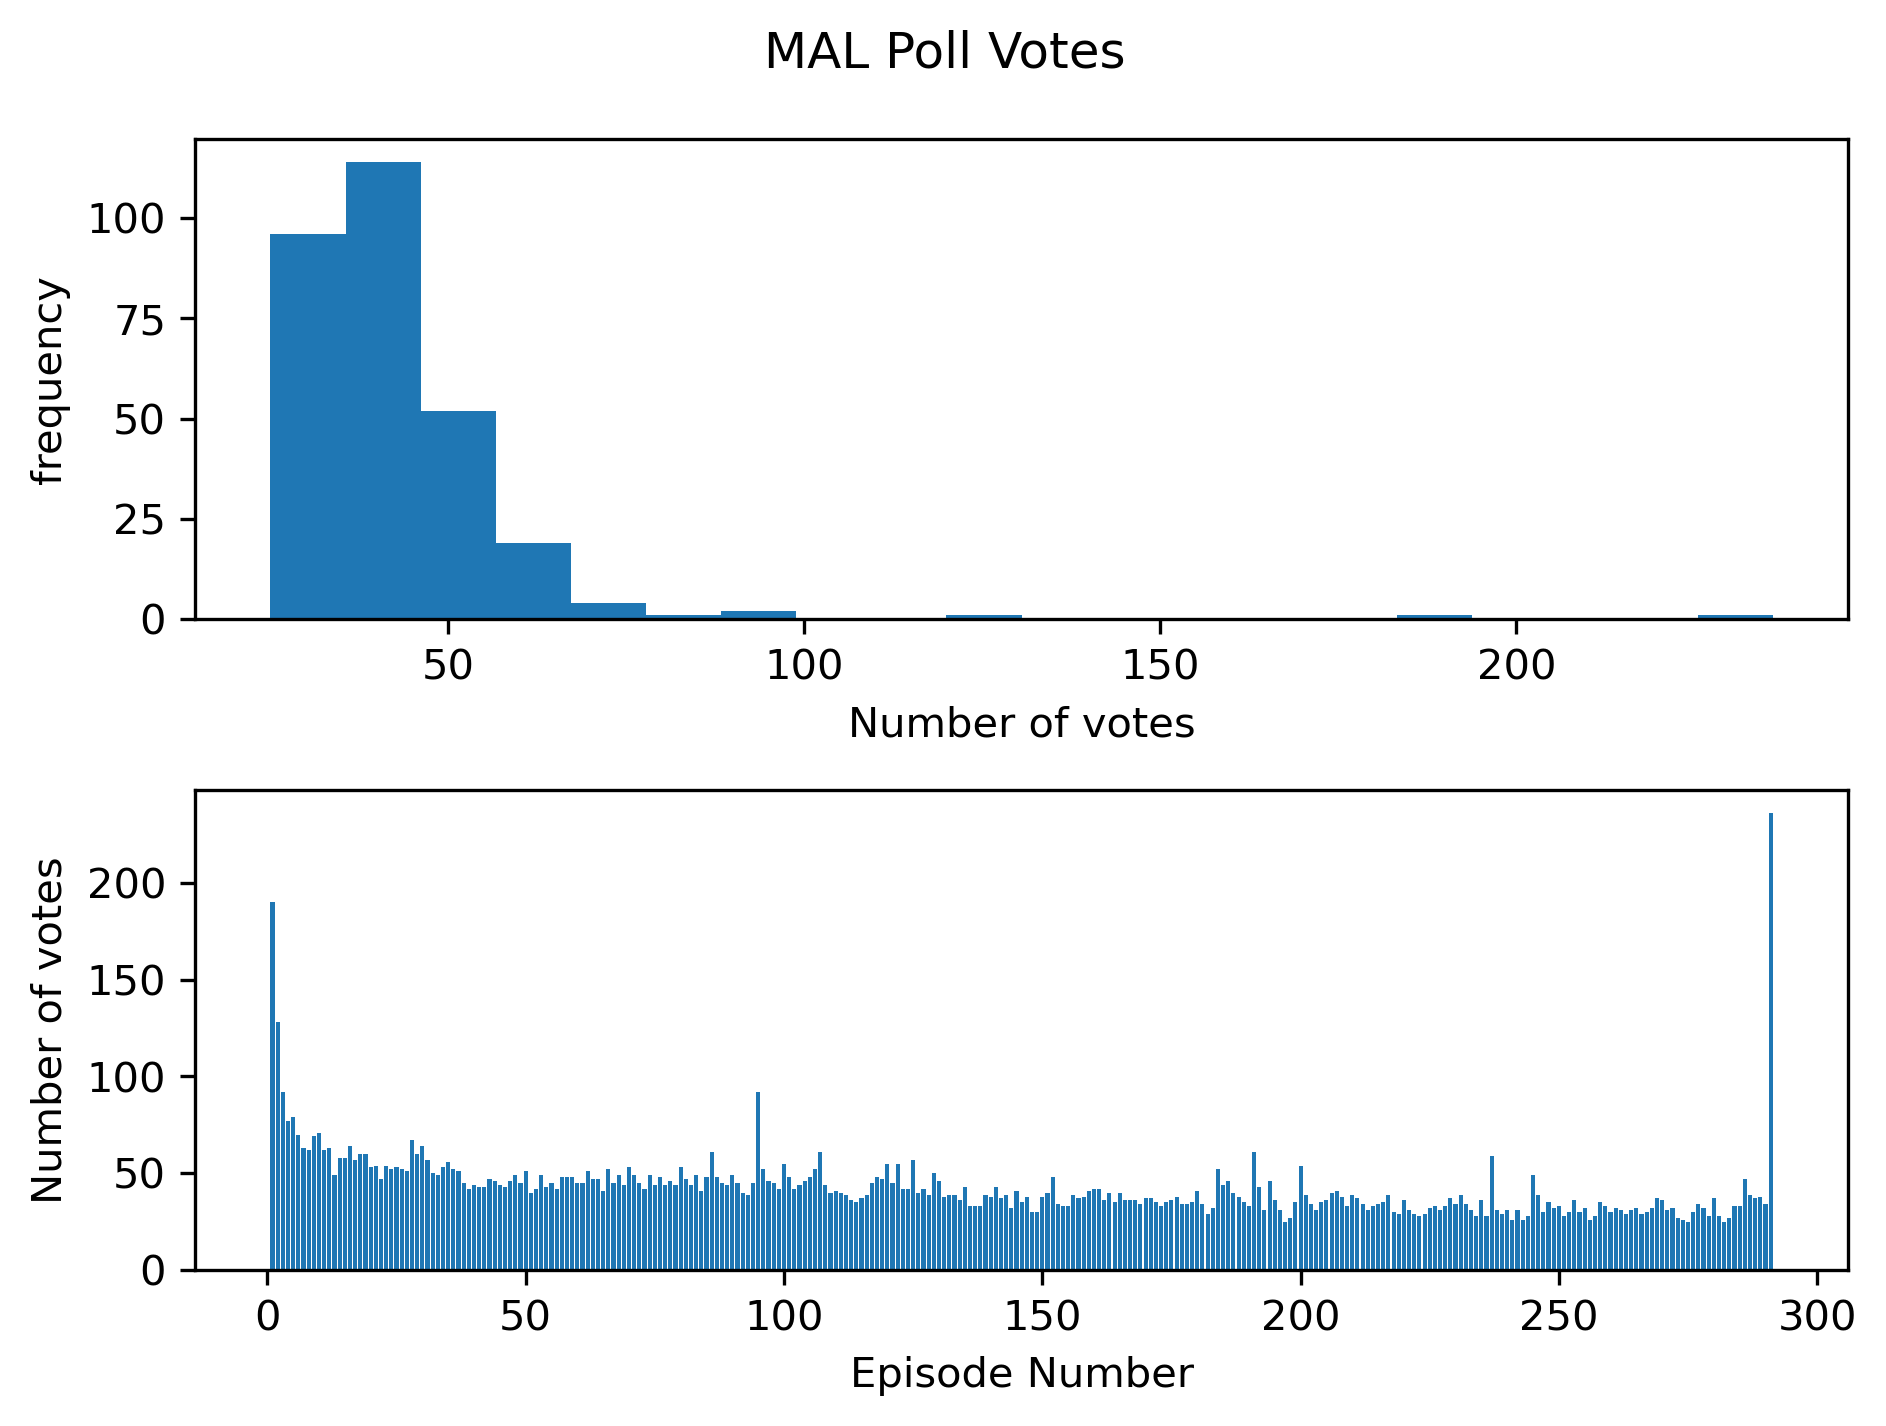

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1,dpi=300)
ax1.hist(compiled_df["MAL_poll_votes"],bins=20)
ax1.set_xlabel("Number of votes")
ax1.set_ylabel("frequency")
ax2.bar(x=compiled_df["mal_id"],\
        height=compiled_df["MAL_poll_votes"])
ax2.set_xlabel("Episode Number")
ax2.set_ylabel("Number of votes")
fig.suptitle("MAL Poll Votes")
fig.tight_layout()
plt.show()

So we see spikes at the first and last episodes, and that the number of votes generally decreases with higher episodes with occasional spikes and dips. 

For the IMDb episode ratings, the number of votes varies between 1204 and 1432, with a median of 1245. So the data is much more reliable than the MAL data. The audiences of these sites will be slightly different, but should be similar enough to be comparable.

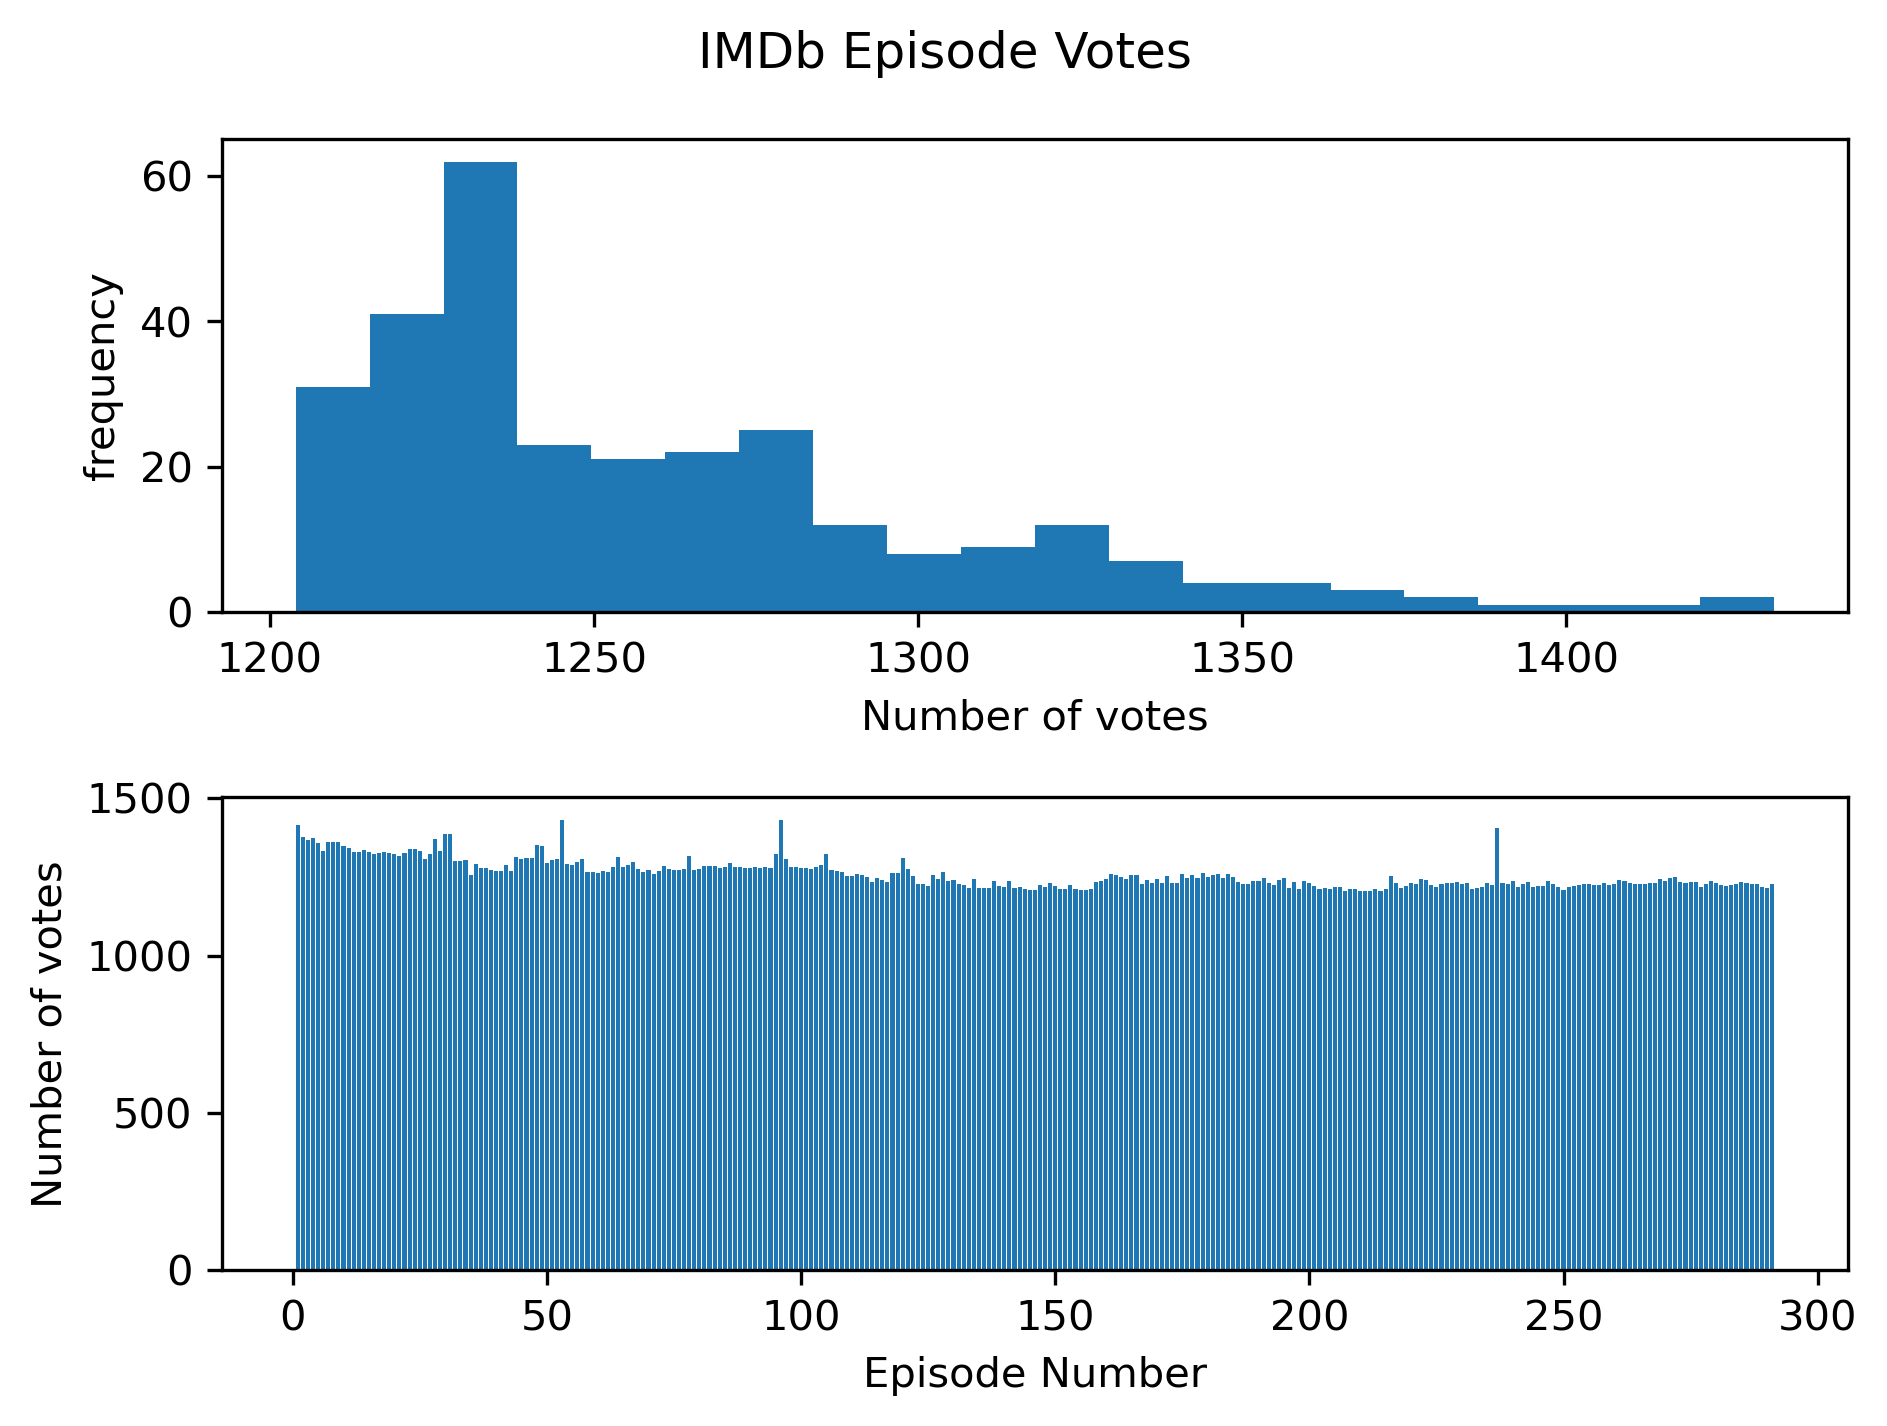

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1,dpi=300)
ax1.hist(compiled_df["IMDb_total_votes"],bins=20)
ax1.set_xlabel("Number of votes")
ax1.set_ylabel("frequency")
ax2.bar(x=compiled_df["mal_id"],\
        height=compiled_df["IMDb_total_votes"])
ax2.set_xlabel("Episode Number")
ax2.set_ylabel("Number of votes")
fig.suptitle("IMDb Episode Votes")
fig.tight_layout()
plt.show()

The number of votes on each episode on IMDb have significantly less relative variation than the number of poll votes on MAL. There are features similar to both, namely the number of votes decreases at high episodes, with occasional spikes. Notably, the IMDb votes are missing the last episode spike and first few episode spikes.

# Scores By Episode
---
Some of the below discussion contains major spoilers for Dragon Ball Z.


In [33]:
# {arc name: (first ep, last ep)}
sagas = {"Saiyan": (1,35),
        "Freeza": (36,107),
        "Garlic Jr": (108,117),
        "Cell": (118,194),
        "Majin Buu": (195,287),
        "End of Z": (288,291)}

## IMDb

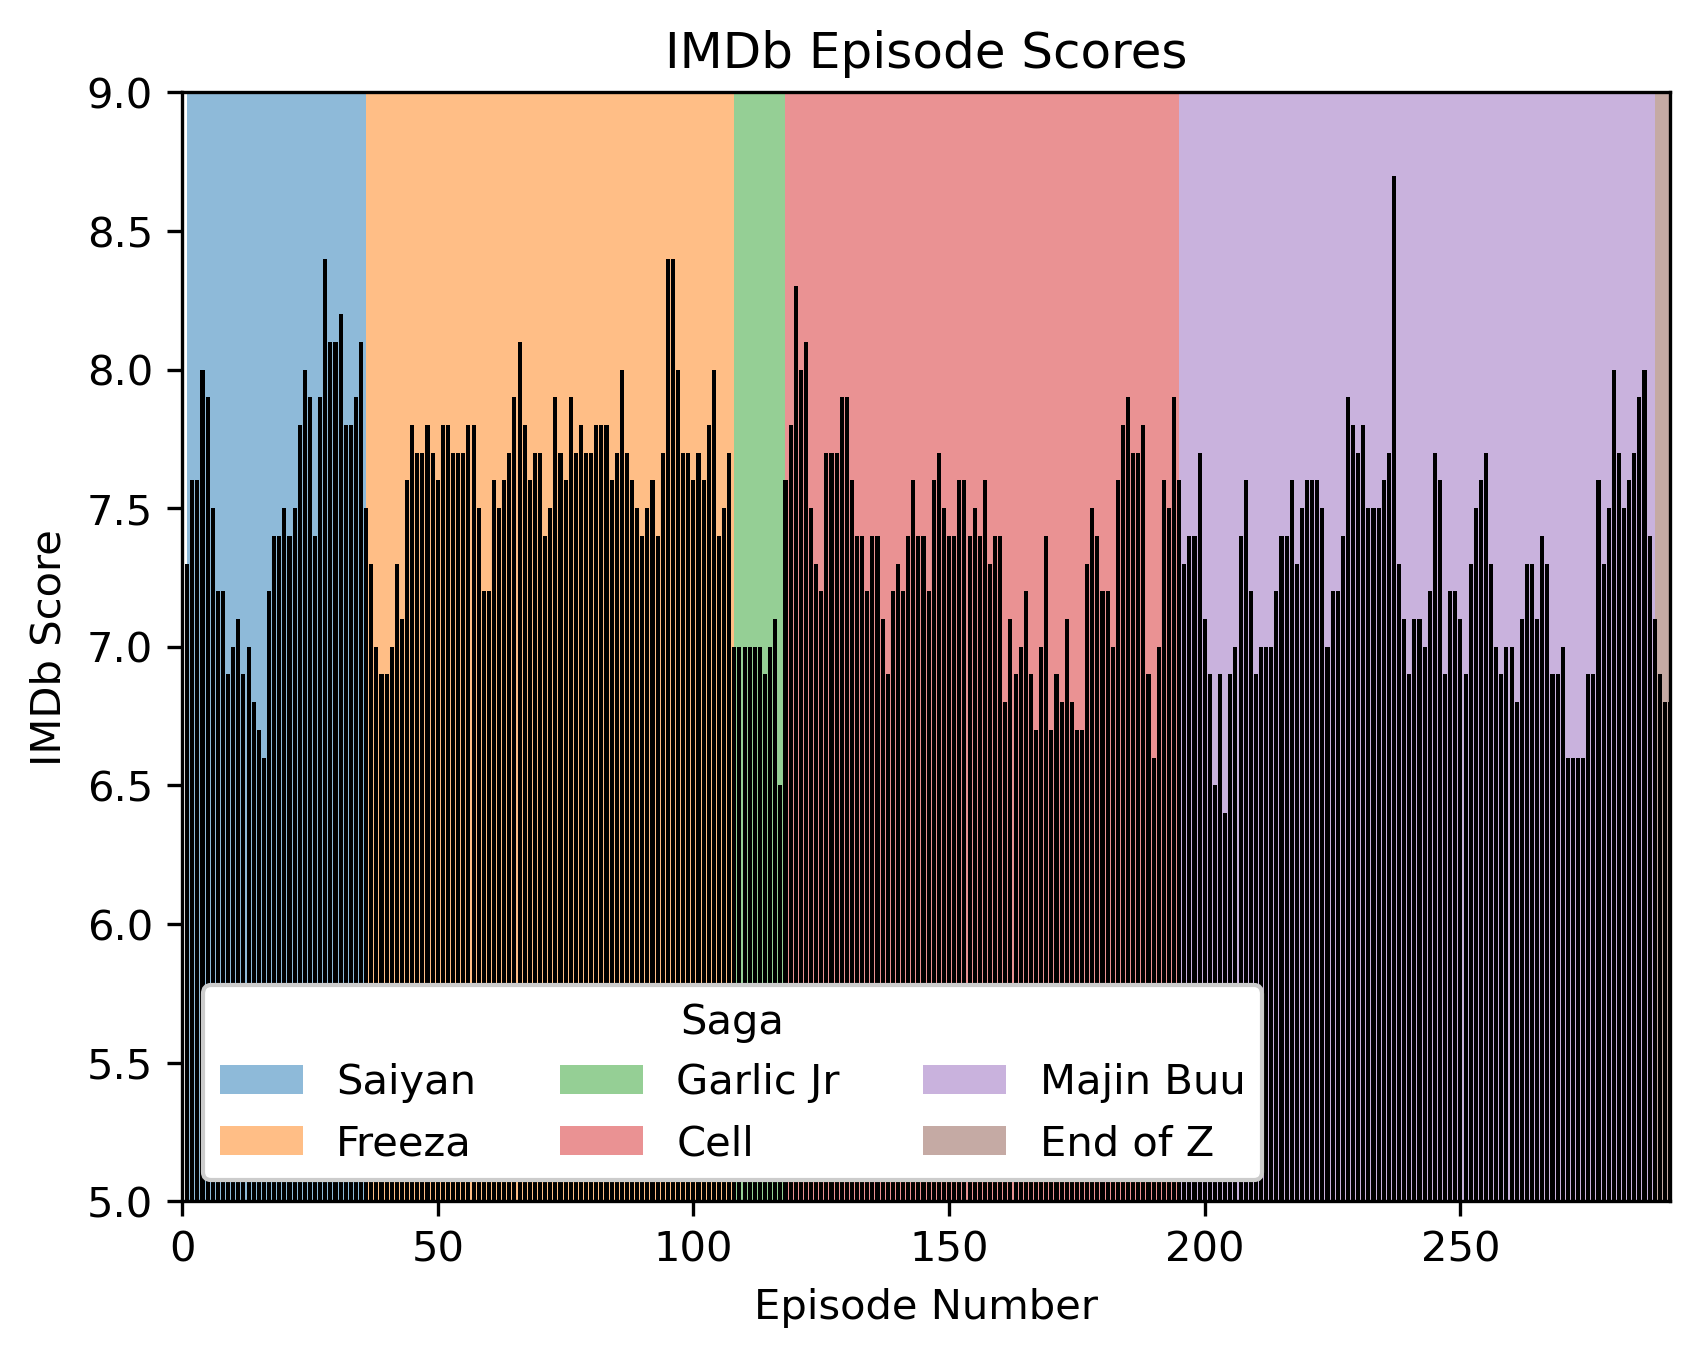

In [54]:
plt.figure(dpi=300)
for saga in sagas:
    # colour background
    plt.fill_betweenx([5,9], sagas[saga][0], sagas[saga][1]+1, alpha=0.5, label=saga)
plt.bar(x=compiled_df['mal_id'], height=compiled_df['IMDb_score'], color="k")
plt.xlim(0,max(compiled_df['mal_id']))
plt.ylim(5,9)
plt.legend(title="Saga",loc='lower left',ncol=3,framealpha=1.0)
plt.xlabel("Episode Number")
plt.ylabel("IMDb Score")
plt.title("IMDb Episode Scores")
plt.show()

In [81]:
top_MAL = compiled_df.sort_values("MAL_score",ascending=False)
top_MAL["prefix"] = ""
top_IMDb = compiled_df.sort_values("IMDb_score",ascending=False)
top_IMDb["prefix"] = ""

print("Top Mal Scores")
# determine and print the top 10 MAL scores, and all tied with them
place = 0
num = 0
prev = max(top_MAL['MAL_score']) + 1
j = 0
for i,row in top_MAL.iterrows():
    if row['MAL_score'] < prev:
        place += 1
        if num >= 10: break
        top_MAL.loc[i,"prefix"] = f"{place}: "
        prev = top_MAL.loc[i,'MAL_score']
    else:
        top_MAL.loc[i,"prefix"] = f"  ="
    j = i
    num += 1
print(top_MAL.loc[:j,["prefix",'title','MAL_score','IMDb_score']].to_string())

print("----------------------")

# same for IMDb
print("Top IMDb Scores")
place = 0
num = 0
prev = max(top_IMDb['IMDb_score']) + 1
j = 0
for i,row in top_IMDb.iterrows():
    if row['IMDb_score'] < prev:
        place += 1
        if num >= 10: break
        top_IMDb.loc[i,"prefix"] = f"{place}: "
        prev = top_IMDb.loc[i,'IMDb_score']
    else:
        top_IMDb.loc[i,"prefix"] = f"  ="
    j = i
    num += 1
print(top_IMDb.loc[:j,["prefix",'title','MAL_score','IMDb_score']].to_string())


Top Mal Scores
    prefix                           title  MAL_score  IMDb_score
235    1:           The Warrior's Decision        4.9         7.7
236      =                 Final Atonement        4.9         8.7
190      =                  Save the World        4.9         7.0
183    2:             Cell Juniors Attack!        4.8         7.8
33       =             Krillin's Offensive        4.8         7.9
229      =          The Long Awaited Fight        4.8         7.7
256      =                   Time Struggle        4.8         7.0
27       =                  Goku's Arrival        4.8         8.4
121      =                Mystery Revealed        4.8         8.1
224      =                Eighteen Unmasks        4.8         7.2
184      =                       Awakening        4.8         7.9
228      =                  Vegeta's Pride        4.8         7.8
186      =         Cell's Mighty Breakdown        4.8         7.7
253      =            The Evil That Men Do        4.8        

The above shows the top episodes for both MAL and IMDb. It is fairly clear that the most well liked episode is *Final Atonement*, as it highest rated or tied highest rated in both IMDb and MAL. This is an episode in the Buu saga where Vegeta sacrifices himself to try and defeat Majin Buu.

This rejects my initial hypothesis of Goku turning super saiyan or Gohan's fight with Super-Perfect Cell being the highest rated.

*Transformed at Last* and *Explosion of Anger*, the first two episodes featuring Goku in his super saiyan form, rate highly on both IMDb and MAL.  

Gohan's fight with Cell covers episodes 181 to 191 (index 180 to 190). A few of these episodes show up in the top MAL scores, in particular episode 191 is one of the three highest rated in the MAL polls. However these do not how up in the top IMDb scores. This suggests a disagreement between the tastes of IMDb and MAL. For example, episode 191 is rated 4.9/5.0 in its MAL poll here, but is rated 7.0 on IMDb. This is surprising, I didn't expect this much disagreement between them.